In [ ]:
# ATMS 305, Lab23: MapData3
# :: More mapping, backgrounds, contours, vectors
#
# The data is a forecast for a frontal passage through Illinois last November.

In [1]:
# >> A. IMPORTs and INSTALLs
#  Import numpy, matplotlib.pyplot, and ...
#         Xarray, and scipy as sp, and import scipy.ndimage
#         ... and everything needed for Cartopy maps including the !pip commands
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import xarray as xr
import scipy as sp
import scipy.ndimage

In [2]:
# >> B. Retrieve data and imagery files
#
# I recommend using wget -N -q ...to -only- download when the file is *N*ewer, and to do it *q*uietly.
#  (BUT if something doesn't work, remove the -q and run the cell again to see the error messages)
#
#  1. Download a Blue Marble image with no clouds - e.g.
#       https://eoimages.gsfc.nasa.gov/images/imagerecords/73000/73801/world.topo.bathy.200409.3x5400x2700.png
#  2. Download this Weather Research and Forecasting model (WRF) forecast data file from today:
#       rfd.atmos.uiuc.edu/305/Data/WRF_MonNov06/wrfout_d01_2023-11-09_00:00:00

!wget -q -N https://eoimages.gsfc.nasa.gov/images/imagerecords/73000/73801/world.topo.bathy.200409.3x5400x2700.png
!wget -q -N rfd.atmos.uiuc.edu/305/Data/WRF_MonNov06/wrfout_d01_2023-11-09_00:00:00


Text(0.5, 1.0, 'C: Basemap')

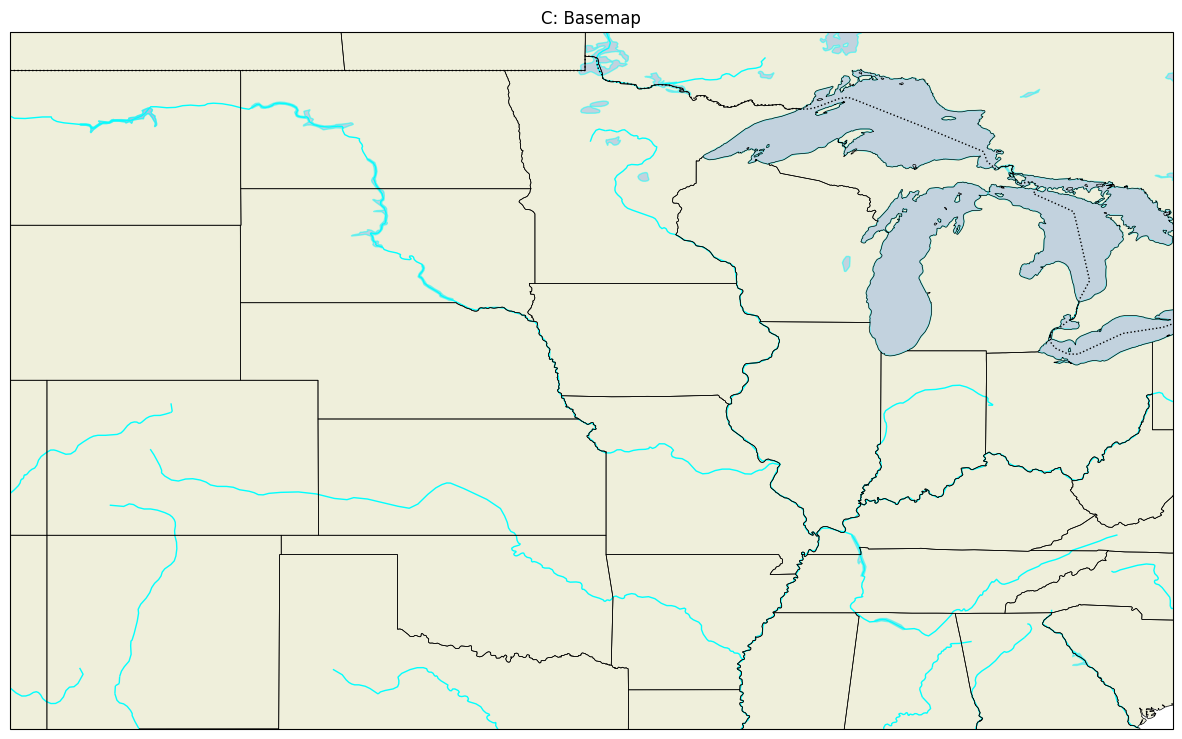

In [7]:
# >> C. Regional map with Cartopy; nothing else (yet)
#
# 1. Start a somewhat large plt.figure(figsize= ...) for this plot; I used 15x12"
# 2. Use plt.axes() to begin a map with projection: PlateCarree
# 3. Add land, lakes, rivers (edgecolor='cyan'), borders (white, ':', edgecolor='black')
# 4. Add states and provinces, edgecolor='black', 1:10,000,000 scale, linewidth=0.5
# 5. Use this region: 110 to 80 W (west, negative, remember?) longitude, 32 to 50 N latitude
# 6. Add title:  C: Basemap
# 7. Run this cell a few times with LAKES transparency(alpha)= 0.0, 0.5, and 1.0
#      to see the impact.  For the final turn-in result, use alpha=0.5
# 8. Run this cell with states_provinces linewidth=2.0, before setting back to 0.5 .
# 9. Run this cell withOUT facecolor='none' for states; then put it back.  Use ^Z to undo!
# CHECK: map runs roughly from Colorado > Ohio west-east, and Texas to southern Canada.

fig = plt.figure(figsize=(15, 12))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES, alpha=0.5, edgecolor='cyan')
ax.add_feature(cfeature.RIVERS, edgecolor='cyan')
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')

states_provinces = cfeature.STATES.with_scale('10m')
ax.add_feature(states_provinces, edgecolor='black', linewidth=0.5, facecolor='none')

ax.set_extent([-110, -80, 32, 50], crs=ccrs.PlateCarree())
ax.set_title('C: Basemap')

Text(0.5, 1.0, 'D: Map with Blue Marble background')

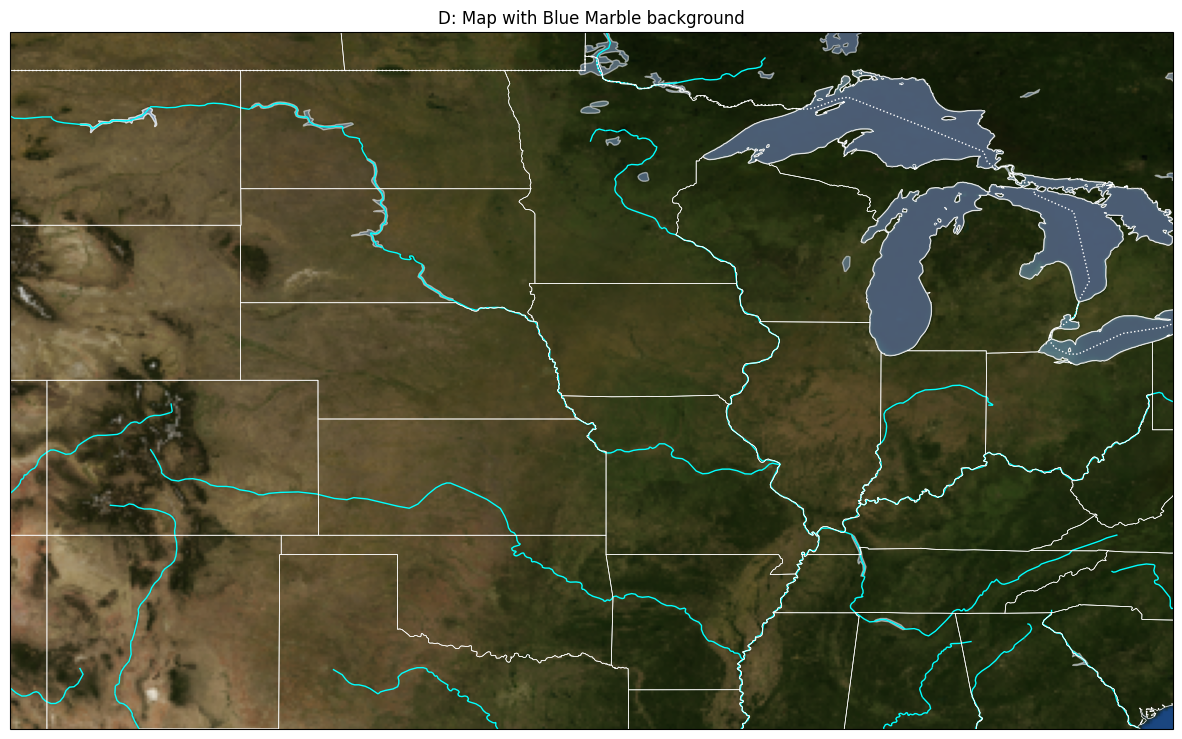

In [8]:
# >> D. Regional map with Cartopy AND background image
#
# 1. Copy and paste the code from the previous cell.
# 2. Read in the Blue Marble image you chose earlier (using imread works).
# 3. Display the Blue Marble image as we have done previously.
# 4. Use this title:  D: Map with Blue Marble background
# 5. With this background, state lines can be difficult to see.
#    change edgecolor to white in BORDERS, and in adding states_provinces.

fig = plt.figure(figsize=(15, 12))
ax = plt.axes(projection=ccrs.PlateCarree())

world = img.imread("world.topo.bathy.200409.3x5400x2700.png")
ax.imshow(world, origin='upper', transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES, alpha=0.5, edgecolor='white')
ax.add_feature(cfeature.RIVERS, edgecolor='cyan')
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='white')

states_provinces = cfeature.STATES.with_scale('10m')
ax.add_feature(states_provinces, edgecolor='white', linewidth=0.5, facecolor='none')

ax.set_extent([-110, -80, 32, 50], crs=ccrs.PlateCarree())
ax.set_title('D: Map with Blue Marble background')

In [9]:
# >> E. OPEN WRF Forecast Data file ('wrfout...'); list contents
#
# 1. Open the WRF forecast data file with Xarray, DS = xr. .....
# 2. The data file is now "opened" so you need not open it again.  We'll read data soon!
# 3. Run just "DS" in the cell to see the contents.  The first field is named XLAT.
#    Click on the little triangle next to "Data variables:" to see ... everything.

DS = xr.load_dataset('wrfout_d01_2023-11-09_00%3A00%3A00')
DS

<xarray.Dataset> Size: 100MB
Dimensions:                (Time: 1, south_north: 139, west_east: 155,
                            bottom_top: 50, bottom_top_stag: 51,
                            soil_layers_stag: 6, west_east_stag: 156,
                            south_north_stag: 140, seed_dim_stag: 2,
                            num_turb_layers: 7)
Coordinates:
    XLAT                   (Time, south_north, west_east) float32 86kB 34.63 ...
    XLONG                  (Time, south_north, west_east) float32 86kB -100.1...
    XTIME                  (Time) datetime64[ns] 8B 2023-11-09
    XLAT_U                 (Time, south_north, west_east_stag) float32 87kB 3...
    XLONG_U                (Time, south_north, west_east_stag) float32 87kB -...
    XLAT_V                 (Time, south_north_stag, west_east) float32 87kB 3...
    XLONG_V                (Time, south_north_stag, west_east) float32 87kB -...
Dimensions without coordinates: Time, south_north, west_east, bottom_top,
                                bottom_top_stag, soil_layers_stag,
                                west_east_stag, south_north_stag,
                                seed_dim_stag, num_turb_layers
Data variables: (12/246)
    Times                  (Time) |S19 19B b'2023-11-09_00:00:00'
    LU_INDEX               (Time, south_north, west_east) float32 86kB 10.0 ....
    ZNU                    (Time, bottom_top) float32 200B 0.9985 ... 0.0181
    ZNW                    (Time, bottom_top_stag) float32 204B 1.0 ... 0.0
    ZS                     (Time, soil_layers_stag) float32 24B 0.0 0.05 ... 3.0
    DZS                    (Time, soil_layers_stag) float32 24B 0.025 ... 0.7
    ...                     ...
    PCB                    (Time, south_north, west_east) float32 86kB 0.0 .....
    PC                     (Time, south_north, west_east) float32 86kB 0.0 .....
    LANDMASK               (Time, south_north, west_east) float32 86kB 1.0 .....
    LAKEMASK               (Time, south_north, west_east) float32 86kB 0.0 .....
    SST                    (Time, south_north, west_east) float32 86kB 280.3 ...
    SST_INPUT              (Time, south_north, west_east) float32 86kB 0.0 .....
Attributes: (12/134)
    TITLE:                            OUTPUT FROM WRF V4.3.3 MODEL
    START_DATE:                      2023-11-06_12:00:00
    SIMULATION_START_DATE:           2023-11-06_12:00:00
    WEST-EAST_GRID_DIMENSION:        156
    SOUTH-NORTH_GRID_DIMENSION:      140
    BOTTOM-TOP_GRID_DIMENSION:       51
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2

In [10]:
# >> F. READ WRF Forecast Data file
#
# 1. Read in these fields: T2, U10, V10, XLAT, XLONG, AFWA_MSLP ... into array names that YOU choose.
#      T2 is the 2 meter (above ground) temperature, a NWS (National Weather Service) standard.
#      U10, V10 are the x- and y- component 2-D wind fields at 10 meters above ground, a NWS standard.
#      XLAT, XLONG are the latitude and longitude fields for the entire domain - also 2-D.
#      AFWA_MSLP is a type of mean-sea-level pressure using methods from the US Air Force Wx Agency.
#      Names you give the arrays do NOT have to match names in the file.  I used "pres" for pressure.
#
#  >> Read EACH field with Xarray as:  arrayname = DS.NameOfField[0,:]
#     Why? If you look at your "DS" listing in cell E, the first index is "time".
#     Sometimes WRF files contain multiple forecast times (though ours does not).
#     Reading it with DS.NameOfField[0,:] chooses time "0", the first in the file.
#     This also means that when we use the array later, we don't have to preface everything with [0, .....]
#
# 2. Time for NumPy: use a FORMATTED print() to display the following
#      quantities using np.min() and np.max():
#         maximum temperature
#         maximum U10, max V10,
#         min AFWA_MSLP *to 2 decimal places*
#     Add some words to indicate which number belongs to which field.
#     This should all be inside ONE print() statement!!
#     Also: when computing the minimum pressure, divide by 100 to convert
#       from Pascals to millibars (mb -- the same as hPa).
#
# 3. No need to convert to mph or deg. Fahrenheit or anything like that here.
#
# CHECK: the max temp is 298.82, and min MSL pressure is 1004.45
temp = DS.T2[0, :]
u10 = DS.U10[0, :]
v10 = DS.V10[0, :]
lat = DS.XLAT[0, :]
lon = DS.XLONG[0, :]
pres = DS.AFWA_MSLP[0, :]

print(f"Maximum Temperature: {np.max(temp):.2f} K, "
      f"Maximum U10: {np.max(u10):.2f} m/s, "
      f"Maximum V10: {np.max(v10):.2f} m/s, "
      f"Minimum AFWA MSLP: {np.min(pres)/100:.2f} mb")


Maximum Temperature: 298.82 K, Maximum U10: 8.28 m/s, Maximum V10: 8.18 m/s, Minimum AFWA MSLP: 1004.45 mb


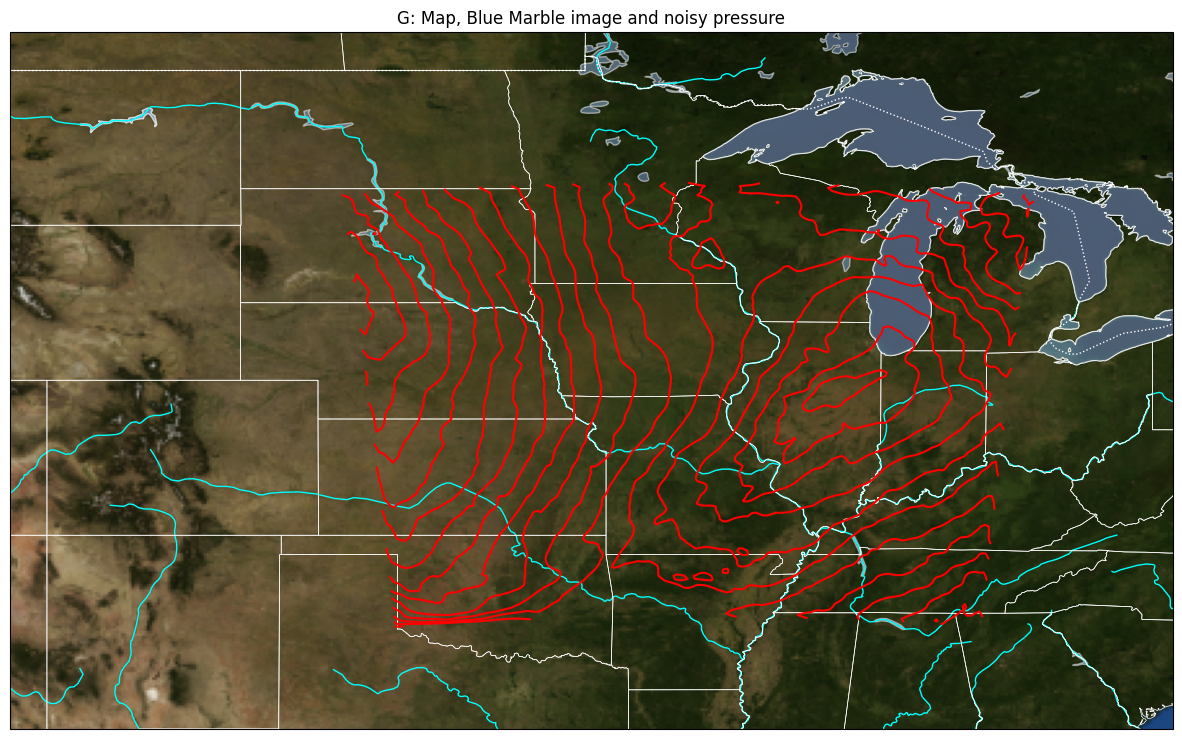

In [13]:
# >> G. Regional map with Cartopy, Image, AND PRESSURE contours
#
# 1. Copy and paste code from cell D above.  Make map + Blue Marble image as before.
#     NOTE you do NOT need to read the background Blue Marble file AGAIN -
#       so you should OMIT the imread() here!!
#
# 2. After all the cell D code, add an ax.contour() call to show the pressure contours.
#    This will look like: contour( lon, lat, pres, 20, transform=...put the right words here...)
#     a) lon and lat are the longitude and latitude arrays - adjust to whatever you called them
#     b) pres is the pressure field - adjust to whatever you named it
#     c) 20 here = plot 20 contours.
#     d) Also in the contour call, add these options: linestyles='solid', colors='red'
#
# 3. Add title:  G: Map, Blue Marble image and noisy pressure
# 4. NOTICE:
#     a) contours don't line up well with the map -- they "fan out" at higher latitudes
#        ... this is because we aren't doing the map quite right!! (map projection issue)
#     b) the pressure field is noisy!!  We fix that in the next cell.
#     c) the map is bigger than the data region.  We fix that in the next cell.
# CHECK: contours cut out in Ohio to the east, and Oklahoma to the south.

fig = plt.figure(figsize=(15, 12))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.imshow(world, origin='upper', transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES, alpha=0.5, edgecolor='white')
ax.add_feature(cfeature.RIVERS, edgecolor='cyan')
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='white')

states_provinces = cfeature.STATES.with_scale('10m')
ax.add_feature(states_provinces, edgecolor='white', linewidth=0.5, facecolor='none')

ax.set_extent([-110, -80, 32, 50], crs=ccrs.PlateCarree())
ax.set_title('G: Map, Blue Marble image and noisy pressure')
ax.contour(lon, lat, pres, 20, linestyles='solid', colors='red', transform=ccrs.PlateCarree())

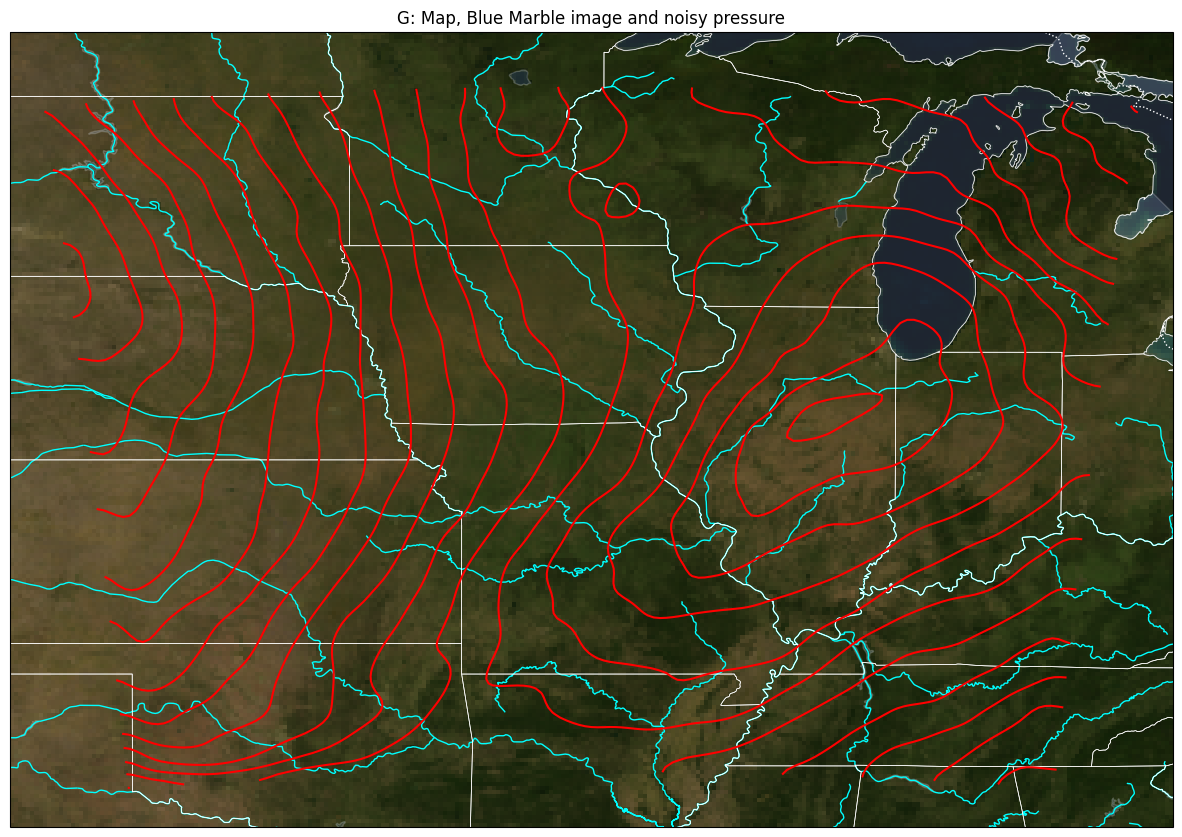

In [28]:
# >> H. MAP, IMAGE, and SMOOTHED Pressure
#
# 1. Copy / paste from last cell all your map, image and contour code.
#       BUT >> we will plot smoothed pressure here, as we've done before!
# 2. Smooth the pressure field with:
#         psmooth = sp.ndimage.gaussian_filter(pres, sigma=2.0, order=0)
#     ... where 'pres' is what I called the pressure field.  Adjust code to fit your names.
#     ... then plot 'psmooth' INSTEAD of the original pressure field!!
#
# 3. Change the set_extent call to have less "open space" on the map around the data,
#     but don't cut off any data!!  You should be eliminating most of Colorado, Ohio
#
# 4. The rivers are distracting now.  Show them with alpha=0.20
#
# 5. Set title to be:  H: Map, Image and Smoothed MSL Pressure

psmooth = sp.ndimage.gaussian_filter(pres, sigma=2.0, order=0)

fig = plt.figure(figsize=(15, 12))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.imshow(world, origin='upper', transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES, alpha=0.2, edgecolor='white')
ax.add_feature(cfeature.RIVERS, edgecolor='cyan')
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='white')

states_provinces = cfeature.STATES.with_scale('10m')
ax.add_feature(states_provinces, edgecolor='white', linewidth=0.5, facecolor='none')

ax.set_extent([-102, -83, 34, 47], crs=ccrs.PlateCarree())
ax.set_title('G: Map, Blue Marble image and noisy pressure')
ax.contour(lon, lat, psmooth, 20, linestyles='solid', colors='red', transform=ccrs.PlateCarree())

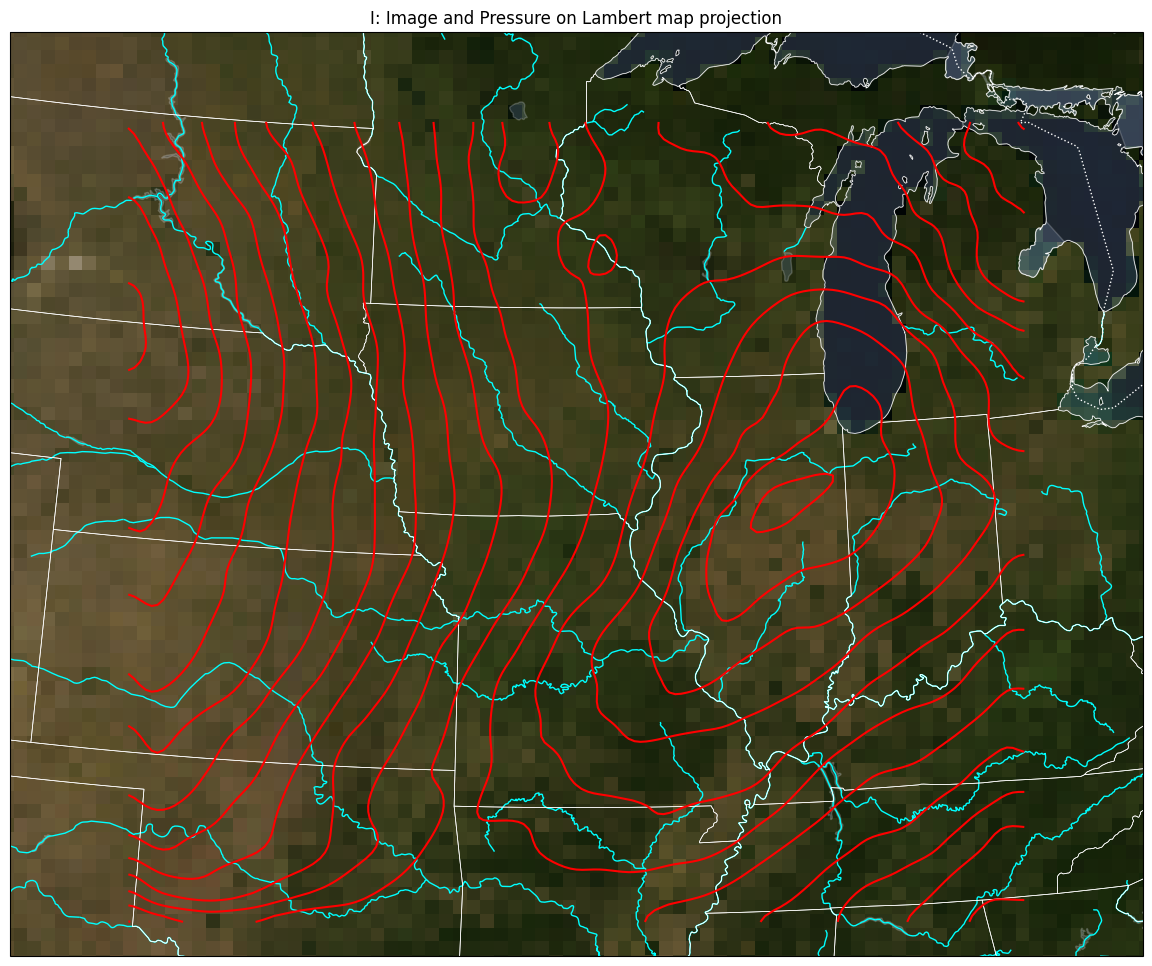

In [33]:
# >> I. LAMBERT Map Projection
#
# 1. Copy / paste from the last cell.
# 2. We're going to CHANGE the plt.axes() call to reflect what was used in
#    the WRF model forecast for this case.
#    a) Change from ccrs.PlateCarree() to ccrs.LambertConformal()
#    b) Inside the parentheses after "Conformal", put these options --
#        .. separated by commas between options ..
#           central_longitude=-92.5
#           central_latitude=40.5
#           standard_parallels=(35.5, 45.5)
#           globe=None, cutoff=10
#       With these changes the data edges should parallel the map edges.
#       Note: leave the rest of your code the same, with PlateCarree() still used
#         in the imshow() and plt.contour() calls.
# 3. Use title: I: Image and Pressure on Lambert map projection
psmooth = sp.ndimage.gaussian_filter(pres, sigma=2.0, order=0)

fig = plt.figure(figsize=(15, 12))

ax = plt.axes(projection=ccrs.LambertConformal(
    central_longitude=-92.5,
    central_latitude=40.5,
    standard_parallels=(35.5, 45.5),
    globe=None,
    cutoff=10
))
ax.imshow(world, origin='upper', transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES, alpha=0.2, edgecolor='white')
ax.add_feature(cfeature.RIVERS, edgecolor='cyan')
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='white')

states_provinces = cfeature.STATES.with_scale('10m')
ax.add_feature(states_provinces, edgecolor='white', linewidth=0.5, facecolor='none')

ax.set_extent([-102, -83, 34, 47], crs=ccrs.PlateCarree())
ax.set_title('I: Image and Pressure on Lambert map projection')
ax.contour(lon, lat, psmooth, 20, linestyles='solid', colors='red', transform=ccrs.PlateCarree())

Text(0.5, 1.0, 'J: Map and pressure with airports and L')

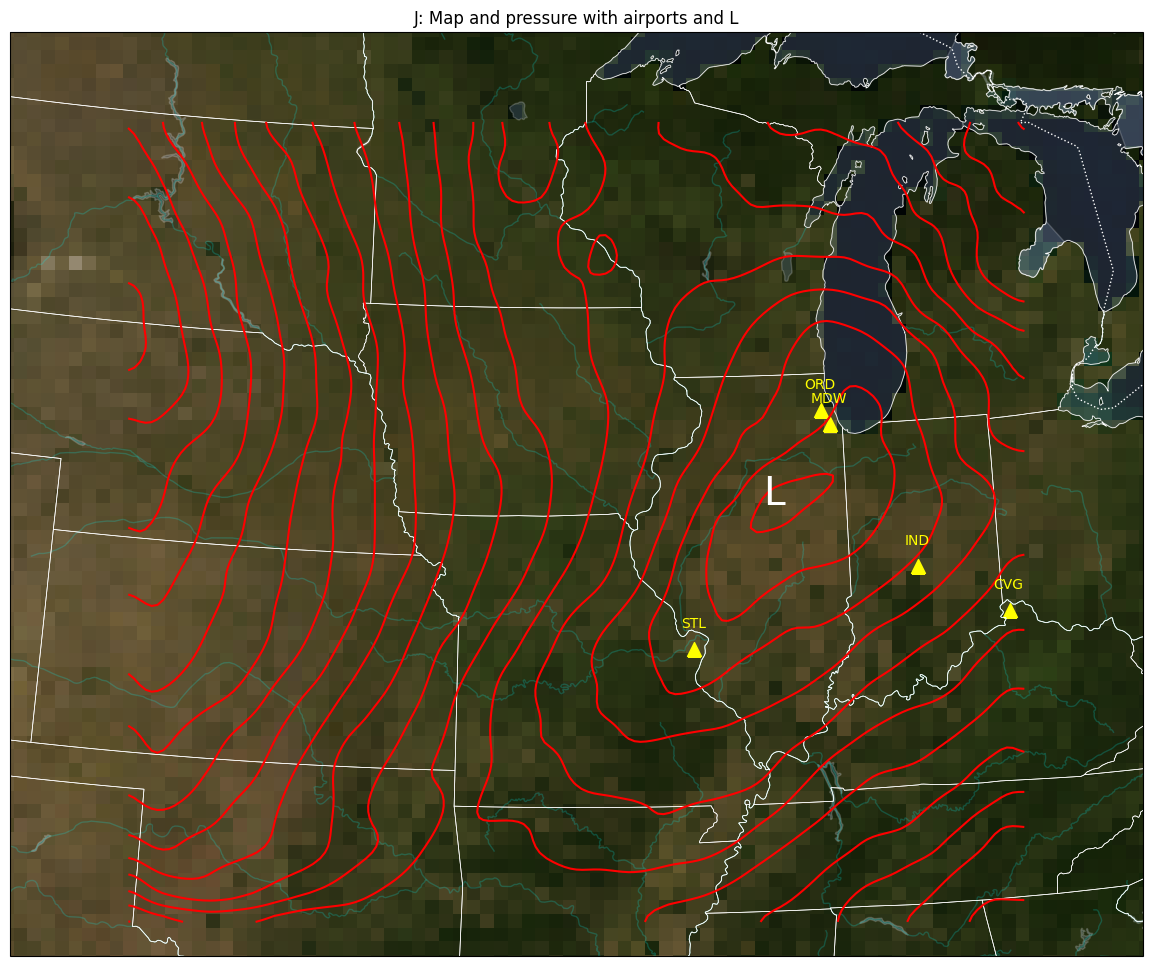

In [37]:
# >> J. ADD AIRPORTS and L at CYCLONE CENTER
#
# 1. Copy / paste from the last cell.
#
# 2. Show these cities/airports as we have done before.
#    Here are required cities - but >> ADD ONE MORE CITY OF YOUR OWN <<
#     cities = [["CVG",39.00,-84.70],
#               ["ORD",41.98,-87.91],
#               ["STL",38.70,-90.40],
#               ["IND",39.71,-86.29]]
#
# 3. Show a low pressure center with a big "L", like this:
#   a) FIND the low pressure center with:
#          x,y = np.where( psmooth == np.min(psmooth) )
#      This gives us coordinates for the lowest pressure.
#      These are actually grid indices, where 0,0 would be the
#      first point in the data array.
#
#   b) SHOW the low pressure center with an ax.text() call, like
#           ax.text( X, Y, TEXT, option, option..)
#      but here: X is lon[x,y], Y is lat[x,y], TEXT is 'L',
#      Use these options:
#        horizontalalignment='center'
#        transform=ccrs.PlateCarree()
#        color='white'
#        fontsize=28
# 4. Use title:  J: Map and pressure with airports and L
# 5. Noted above but I'll repeat myself:
#      Add ONE airport/city to "cities" of your choosing!


psmooth = sp.ndimage.gaussian_filter(pres, sigma=2.0, order=0)

fig = plt.figure(figsize=(15, 12))

ax = plt.axes(projection=ccrs.LambertConformal(
    central_longitude=-92.5,
    central_latitude=40.5,
    standard_parallels=(35.5, 45.5),
    globe=None,
    cutoff=10
))

ax.imshow(world, origin='upper', transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES, alpha=0.2, edgecolor='white')
ax.add_feature(cfeature.RIVERS, edgecolor='cyan', alpha=0.2)
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='white')

states_provinces = cfeature.STATES.with_scale('10m')
ax.add_feature(states_provinces, edgecolor='white', linewidth=0.5, facecolor='none')
ax.set_extent([-102, -83, 34, 47], crs=ccrs.PlateCarree())

cities = [["CVG",39.00,-84.70],
          ["ORD",41.98,-87.91],
          ["STL",38.70,-90.40],
          ["IND",39.71,-86.29],
          ["MDW",41.78,-87.75]]

x, y = np.where(psmooth == np.min(psmooth))
lon_min = lon[x[0], y[0]]
lat_min = lat[x[0], y[0]]

ax.text(lon_min, lat_min, 'L',
        horizontalalignment='center',
        transform=ccrs.PlateCarree(),
        color='white',
        fontsize=28)

for city in cities:
    code, lat_city, lon_city = city
    ax.scatter(lon_city, lat_city, marker='^', color='yellow', s=100, transform=ccrs.PlateCarree())
    ax.text(lon_city, lat_city + 0.3, code, transform=ccrs.PlateCarree(), color='yellow', horizontalalignment='center')

ax.contour(lon, lat, psmooth, 20, linestyles='solid', colors='red', transform=ccrs.PlateCarree())
ax.set_title('J: Map and pressure with airports and L')

Text(0.5, 1.0, 'K: Map and pressure, temperature')

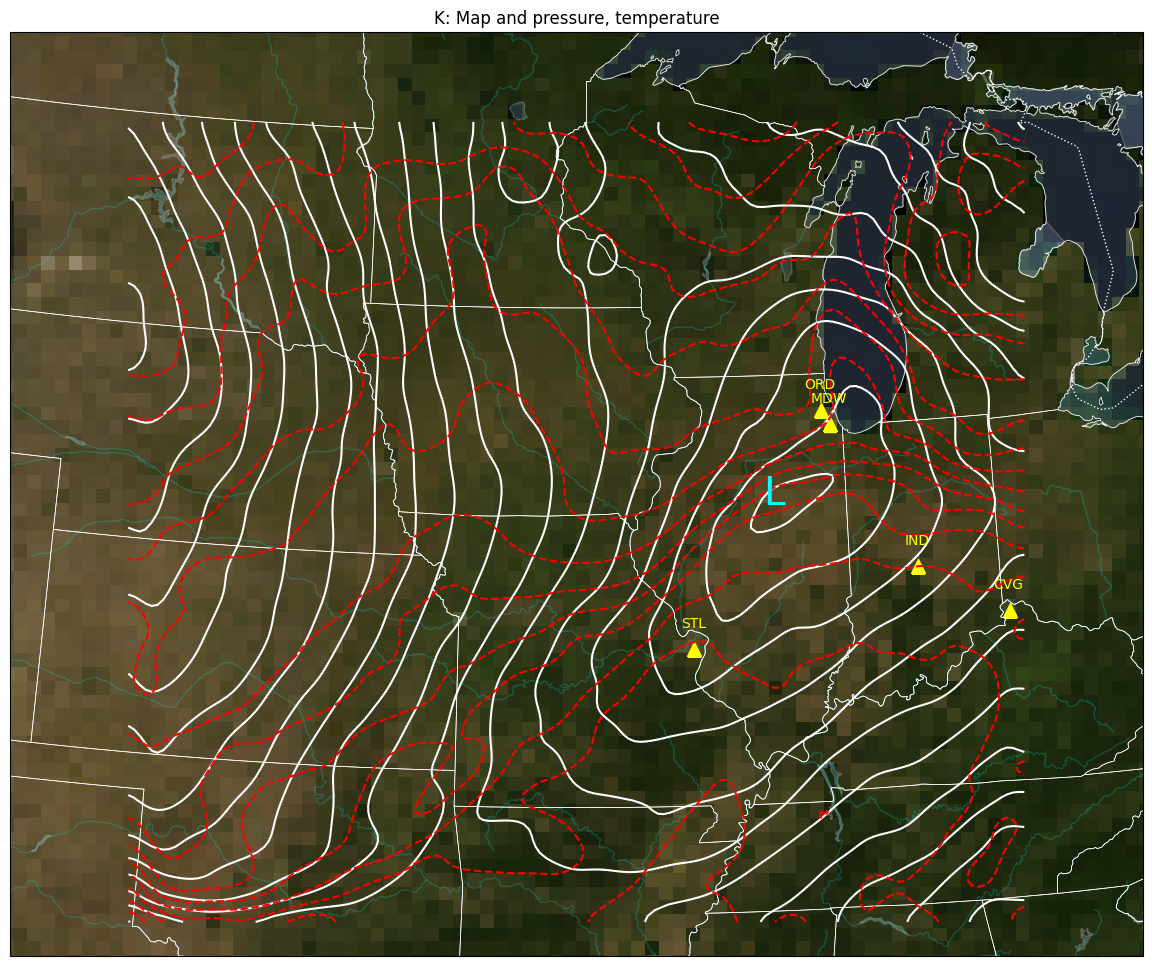

In [38]:
# >> K. ADD TEMPERATURE
#
# 1. Copy / paste from the last cell.
# 2. Show cities/airports as before.
# 3. Show pressure contours in white this time.
# 4. Smooth the temperature field and show 20 contours in dashed red
# 5. Use title:  K: Map and pressure, temperature
# 6. Show pressure L center but in cyan here.
tsmooth = sp.ndimage.gaussian_filter(temp, sigma=2.0, order=0)

fig = plt.figure(figsize=(15, 12))

ax = plt.axes(projection=ccrs.LambertConformal(
    central_longitude=-92.5,
    central_latitude=40.5,
    standard_parallels=(35.5, 45.5),
    globe=None,
    cutoff=10
))

ax.imshow(world, origin='upper', transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES, alpha=0.2, edgecolor='white')
ax.add_feature(cfeature.RIVERS, edgecolor='cyan', alpha=0.2)
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='white')

states_provinces = cfeature.STATES.with_scale('10m')
ax.add_feature(states_provinces, edgecolor='white', linewidth=0.5, facecolor='none')
ax.set_extent([-102, -83, 34, 47], crs=ccrs.PlateCarree())

cities = [["CVG",39.00,-84.70],
          ["ORD",41.98,-87.91],
          ["STL",38.70,-90.40],
          ["IND",39.71,-86.29],
          ["MDW",41.78,-87.75]]

x, y = np.where(psmooth == np.min(psmooth))
lon_min = lon[x[0], y[0]]
lat_min = lat[x[0], y[0]]

ax.text(lon_min, lat_min, 'L',
        horizontalalignment='center',
        transform=ccrs.PlateCarree(),
        color='cyan',
        fontsize=28)

for city in cities:
    code, lat_city, lon_city = city
    ax.scatter(lon_city, lat_city, marker='^', color='yellow', s=100, transform=ccrs.PlateCarree())
    ax.text(lon_city, lat_city + 0.3, code, transform=ccrs.PlateCarree(), color='yellow', horizontalalignment='center')

ax.contour(lon, lat, psmooth, 20, linestyles='solid', colors='white', transform=ccrs.PlateCarree())
ax.contour(lon, lat, tsmooth, 20, linestyles='dashed', colors='red', transform=ccrs.PlateCarree())
ax.set_title('K: Map and pressure, temperature')

In [ ]:
# USE THIS cell to SAVE NOTEBOOK as HTML
# %%shell
# jupyter nbconvert --to html  NAME